In [1]:
import ijson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
NUM_OF_FILES = 214314
extractors = {'hdf', 'netcdf', 'keyword', 'images', 'tabular', 'jsonxml', 'python', 'c-code'}

times_dict = dict()
for extractor in extractors:
	times_dict[extractor] = {'time': np.zeros(NUM_OF_FILES), 'success':np.zeros(NUM_OF_FILES)}


In [3]:
f = open("data/all_cdiac_mdata.simplejson", "r")
count = 0 
startMdata = False

parser = ijson.parse(f)
for prefix, event, value in parser:
	#print(prefix, event, value)
	if prefix == "":
		count += 1
	else:
		#  If there is NO METADATA for an extractor, but there IS that extractor in type_guesses, then it is still successful
		if prefix.endswith(".type_guesses.item") and event == "string" and value != "empty":
			if value == 'compressed' or value == 'executable':
				continue
			if value == 'xml' or value == 'json':
				value = 'jsonxml'
			times_dict[value]['success'][count - 2] = 1 
		elif prefix.endswith("extraction_time"):
			ext_type = prefix.split('.')[2]
			times_dict[ext_type]['time'][count - 2] = value
		elif event == "start_map":
			split_fix = prefix.split('.')
			if len(split_fix) == 3 and split_fix[2] in extractors:
				startMdata = True
		elif event == "map_key":
			split_fix = prefix.split('.')
			if len(split_fix) == 3 and split_fix[2] in extractors:
				if value != "extraction_time" and startMdata:
					times_dict[split_fix[2]]['success'][count - 2] = 1 
				else: # it IS extraction time so don't consider it 
					startMdata = False


In [11]:
# Single Boxplots of Time
time_only_dict = dict()
df = pd.DataFrame()

for k, v in times_dict.items():
	time_only_dict[k] = v['time']

df = pd.DataFrame.from_dict(time_only_dict, orient='columns')
print(df)

          c-code    tabular    python   jsonxml       hdf    images  \
0       0.006132  20.235201  0.016311  0.005888  0.010767  1.537709   
1       0.078013   0.456374  0.342545  0.040219  0.040406  0.186974   
2       0.076884   0.445565  0.316349  0.011902  0.031332  0.111065   
3       0.080474   0.450889  0.433763  0.053426  0.043311  0.110628   
4       0.002724  20.235201  0.008993  0.005042  0.011076  0.085514   
...          ...        ...       ...       ...       ...       ...   
214309  0.053315   0.420552  0.287629  0.007831  0.006309  0.095104   
214310  0.005263   0.004355  0.017761  0.061617  0.004912  0.091377   
214311  0.001726   0.004082  0.005877  0.006217  0.007511  0.204872   
214312  0.001847   0.003591  0.044655  0.017323  0.004357  0.085372   
214313  0.001903   0.003035  0.004388  0.019519  0.004909  0.089702   

          keyword    netcdf  
0        2.570760  0.002941  
1        6.090747  0.003202  
2        7.014906  0.002940  
3       28.071864  0.002827

In [14]:
melted = pd.melt(df)
melted.rename(columns={ melted.columns[0]: "extractor" }, inplace = True)
print(melted)

        extractor     value
0          c-code  0.006132
1          c-code  0.078013
2          c-code  0.076884
3          c-code  0.080474
4          c-code  0.002724
...           ...       ...
1714507    netcdf  0.002613
1714508    netcdf  0.002459
1714509    netcdf  0.002534
1714510    netcdf  0.002595
1714511    netcdf  0.002689

[1714512 rows x 2 columns]


<AxesSubplot:xlabel='variable', ylabel='value'>

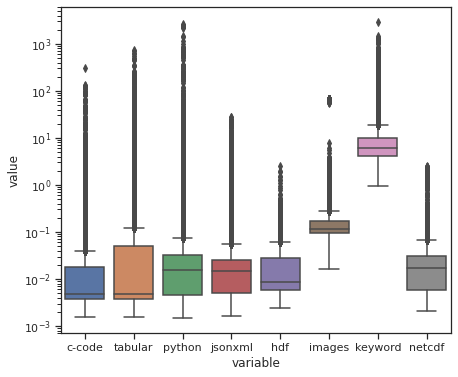

In [5]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(x="variable", y="value", data=pd.melt(df), showfliers=True)

In [45]:
df = pd.DataFrame()

df_dict = dict()

for k, v in times_dict.items():
	extract_df = pd.DataFrame.from_dict(v, orient='columns')
	extract_df.rename(columns={'time': k + ' time', 'success': k + ' success'}, inplace=True)
	df_dict[k] = extract_df

print(df_dict)

{'c-code':         c-code time  c-code success
0          0.006132             0.0
1          0.078013             0.0
2          0.076884             0.0
3          0.080474             0.0
4          0.002724             0.0
...             ...             ...
214309     0.053315             0.0
214310     0.005263             0.0
214311     0.001726             0.0
214312     0.001847             0.0
214313     0.001903             0.0

[214314 rows x 2 columns], 'tabular':         tabular time  tabular success
0          20.235201              0.0
1           0.456374              1.0
2           0.445565              1.0
3           0.450889              1.0
4          20.235201              0.0
...              ...              ...
214309      0.420552              1.0
214310      0.004355              0.0
214311      0.004082              0.0
214312      0.003591              0.0
214313      0.003035              0.0

[214314 rows x 2 columns], 'python':         python time  pyt

In [42]:
df_dict_2 = dict()

for k, v in times_dict.items():
	extract_df = pd.DataFrame.from_dict(v, orient='columns')
	df_dict_2[k] = extract_df

print(df_dict_2)

{'c-code':             time  success
0       0.006132      0.0
1       0.078013      0.0
2       0.076884      0.0
3       0.080474      0.0
4       0.002724      0.0
...          ...      ...
214309  0.053315      0.0
214310  0.005263      0.0
214311  0.001726      0.0
214312  0.001847      0.0
214313  0.001903      0.0

[214314 rows x 2 columns], 'tabular':              time  success
0       20.235201      0.0
1        0.456374      1.0
2        0.445565      1.0
3        0.450889      1.0
4       20.235201      0.0
...           ...      ...
214309   0.420552      1.0
214310   0.004355      0.0
214311   0.004082      0.0
214312   0.003591      0.0
214313   0.003035      0.0

[214314 rows x 2 columns], 'python':             time  success
0       0.016311      0.0
1       0.342545      0.0
2       0.316349      0.0
3       0.433763      0.0
4       0.008993      0.0
...          ...      ...
214309  0.287629      0.0
214310  0.017761      0.0
214311  0.005877      0.0
214312  0.044655

In [43]:
big_dict = pd.DataFrame()
for k, v in df_dict_2.items():

	name = pd.DataFrame(np.full(v.shape[0], k), columns=["extractor"])
	v = pd.concat([name, v], axis=1, ignore_index=True)
	v.rename(columns={v.columns[0]: "extractor", v.columns[1]: "time", v.columns[2]: "success" }, inplace = True)

	if big_dict.empty:
		big_dict = v
	else:
		big_dict = pd.concat([big_dict, v], axis=0)

print(big_dict)

       extractor      time  success
0         c-code  0.006132      0.0
1         c-code  0.078013      0.0
2         c-code  0.076884      0.0
3         c-code  0.080474      0.0
4         c-code  0.002724      0.0
...          ...       ...      ...
214309    netcdf  0.002613      0.0
214310    netcdf  0.002459      0.0
214311    netcdf  0.002534      0.0
214312    netcdf  0.002595      0.0
214313    netcdf  0.002689      0.0

[1714512 rows x 3 columns]


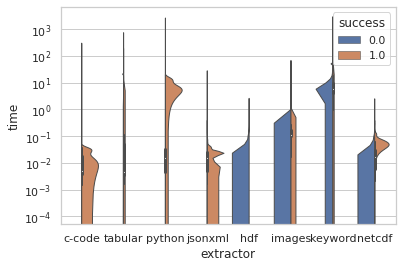

In [44]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="extractor", y="time", hue="success",
                    data=big_dict, linewidth=1, split=True, showfliers=False)

ax.set_yscale('log')


8
10


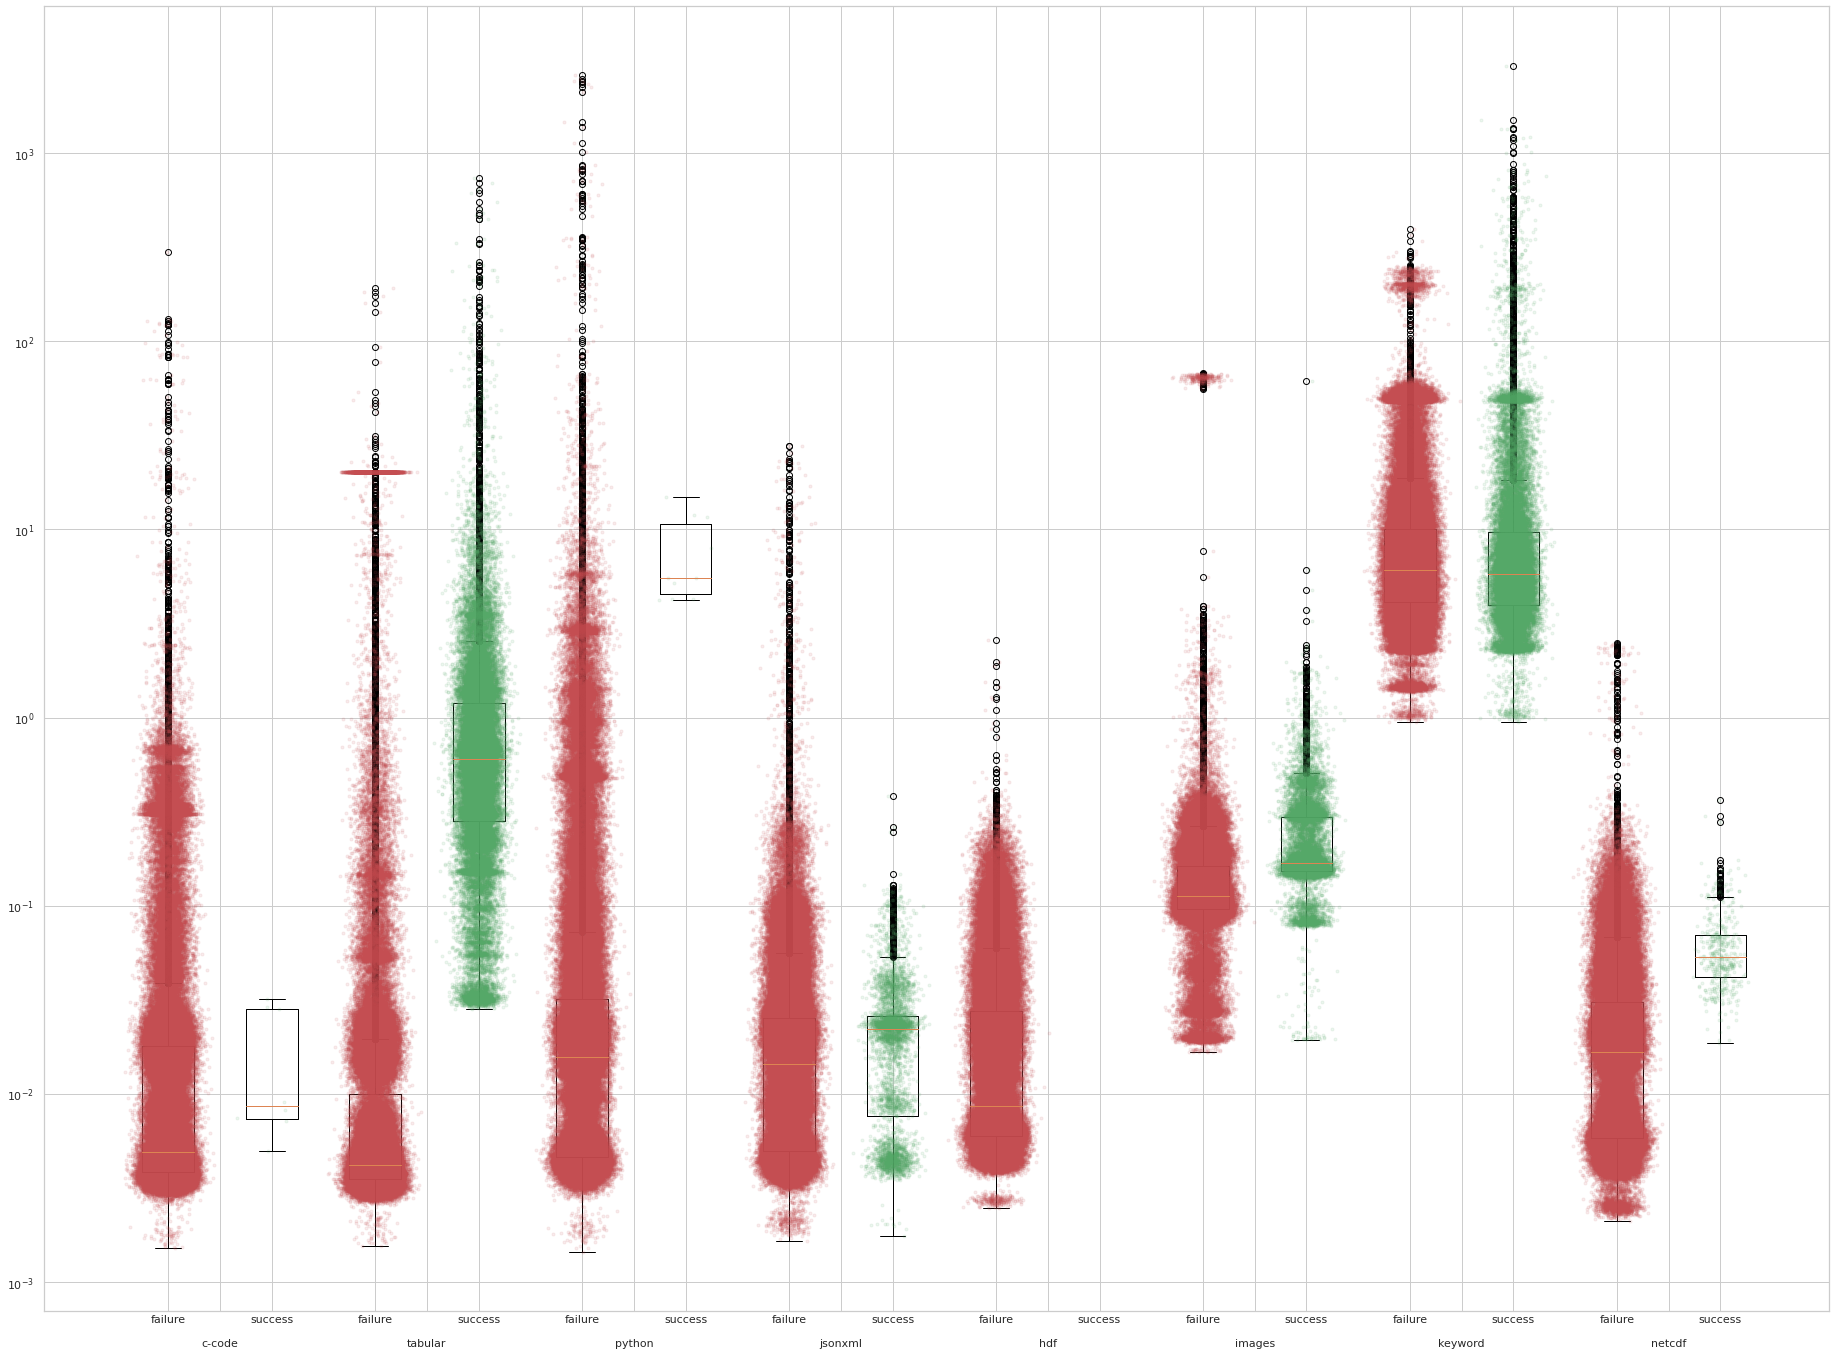

In [46]:
x = []
curr_pos = np.array([-400, -300])
fig = plt.figure(figsize=(32, 24))
ax = fig.add_subplot(111)
ax.set_yscale('log')

labels = []
for k, v in df_dict.items():
	labels.append(k)

	failure = v.loc[v[k + ' success'] == 0].loc[:,k + ' time']
	success = v.loc[v[k + ' success'] == 1].loc[:,k + ' time']

	if k == 'python':
		print(len(success))
	if k == 'c-code':
		print(len(success))


	plt.boxplot(np.array([failure.values, success.values], dtype=object),positions=curr_pos,widths=50, showfliers=True)

	plt.plot(np.random.normal(curr_pos[0], 10, len(failure.values)), failure.values, 'r.', alpha=0.1)
	plt.plot(np.random.normal(curr_pos[1], 10, len(success.values)), success.values, 'g.', alpha=0.1)

	
	x.append(curr_pos[0])
	x.append((curr_pos[0] + curr_pos[1]) / 2)
	x.append(curr_pos[1])

	curr_pos += 200


plt.xticks(x)
ax.tick_params(axis='x', which='both',length=0)
ax.set_xticklabels(('failure', '\n\n' + labels[0], 'success', 'failure', '\n\n' + labels[1], 'success', 'failure', '\n\n' + labels[2], 'success', 
					'failure', '\n\n' + labels[3], 'success', 'failure', '\n\n' + labels[4], 'success', 'failure', '\n\n' + labels[5], 'success', 
					'failure', '\n\n' + labels[6], 'success', 'failure', '\n\n' + labels[7], 'success'), ha='center')


plt.show()
